In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.svm import SVC

In [2]:
# 生成数据：1000个样本，分为4个簇
X, y = make_blobs(n_samples=1000, centers=4, random_state=42)

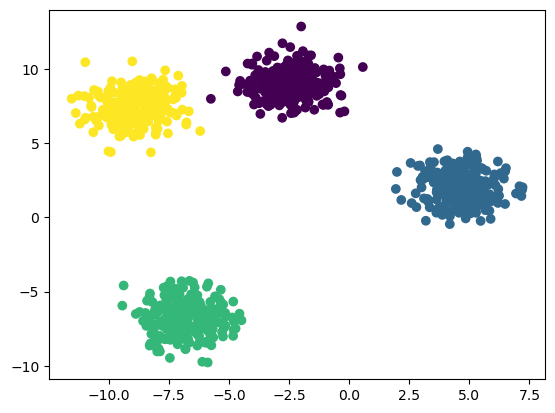

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)

In [5]:
# 模拟半监督信息：只标记10%的样本
rng = np.random.RandomState(42)
labels = np.full(y.shape, -1)
random_labeled_points = rng.choice(len(y), size=int(0.1 * len(y)), replace=False)
labels[random_labeled_points] = y[random_labeled_points]

In [6]:
# 使用SVM作为半监督模型
svc = SVC(probability=True, gamma="scale")
self_training_model = SelfTrainingClassifier(svc)

In [7]:
# 训练半监督模型
self_training_model.fit(X, labels)

SelfTrainingClassifier(base_estimator=SVC(probability=True))

In [8]:
# 预测并评估
y_pred = self_training_model.predict(X)
score = adjusted_rand_score(y, y_pred)

print(f"Adjusted Rand Score (评价聚类结果的好坏): {score:.4f}")

Adjusted Rand Score (评价聚类结果的好坏): 0.9973
